<a href="https://colab.research.google.com/github/Jacqueline45/EE559_Project/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
##PairPlot
##boxPlot


In [ ]:
!unzip /content/EE559_Project-main.zip

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [40]:
fires_train = pd.read_csv("/content/EE559_Project-main/datasets/algerian_fires_train.csv")
fires_test = pd.read_csv("/content/EE559_Project-main/datasets/algerian_fires_test.csv")

fires_1 = fires_train.iloc[:,1:,]
firestst_1 = fires_test.iloc[:,1:,]

fires_trainx = fires_train.iloc[:,1:-1]
fires_trainy = fires_train.iloc[:,-1]
fires_testx = fires_test.iloc[:,1:-1]
fires_testy = fires_test.iloc[:,-1]

scalar = MinMaxScaler()

fires = scalar.fit_transform(fires_trainx)
firestst = scalar.fit_transform(fires_testx)

In [17]:
X = fires_train.drop(['Classes','Date'], axis = 1).values
X

array([[ 1.89523987e+01,  4.38558646e+01,  1.22925358e+01, ...,
         2.85435729e+01,  4.87245655e-01,  6.22546120e+00],
       [ 3.44986100e+01,  4.62304410e+01,  1.48382107e+01, ...,
        -1.00076357e+01, -1.47215814e+00,  2.26810354e+00],
       [ 1.52586647e+01,  5.70842791e+01,  1.09686959e+01, ...,
        -1.37745877e+01,  1.33873657e+00, -3.32790768e+00],
       ...,
       [ 4.47509661e+01,  5.84287525e+01,  2.16879391e+01, ...,
         1.76118476e+02, -2.71473975e-01,  3.03402673e+01],
       [ 3.32982696e+01,  7.95583286e+01,  2.04642690e+01, ...,
        -1.12980333e+01,  3.57983620e-02,  4.74474070e+00],
       [ 3.27622955e+01,  8.43226855e+01,  2.16539323e+01, ...,
         1.65945211e+02,  1.04402990e+01,  3.59865523e+01]])

In [7]:
print(fires_trainx.head())
print(fires_trainx.shape)
print(fires_trainx.columns)

   Temperature          RH         Ws       Rain       FFMC       DMC  \
0    18.952399   43.855865  12.292536  -0.340306  73.063752 -2.371083   
1    34.498610   46.230441  14.838211   0.939652  56.027977  0.441002   
2    15.258665   57.084279  10.968696   1.397913  33.114404  3.389994   
3    24.847936   99.910000  17.924025   3.958666  26.148986  5.179630   
4    19.381227  104.398680  23.740540  13.394723  28.658020 -2.247164   

          DC       ISI       BUI  
0  28.543573  0.487246  6.225461  
1 -10.007636 -1.472158  2.268104  
2 -13.774588  1.338737 -3.327908  
3  -1.392789 -0.755090  0.131303  
4  -3.432689  0.558249 -1.928471  
(184, 9)
Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI'], dtype='object')


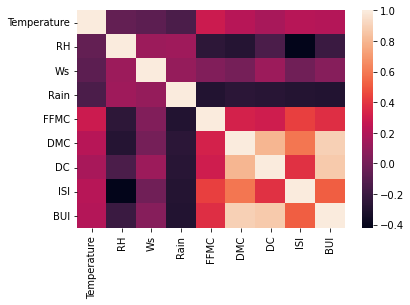

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr=fires_trainx.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

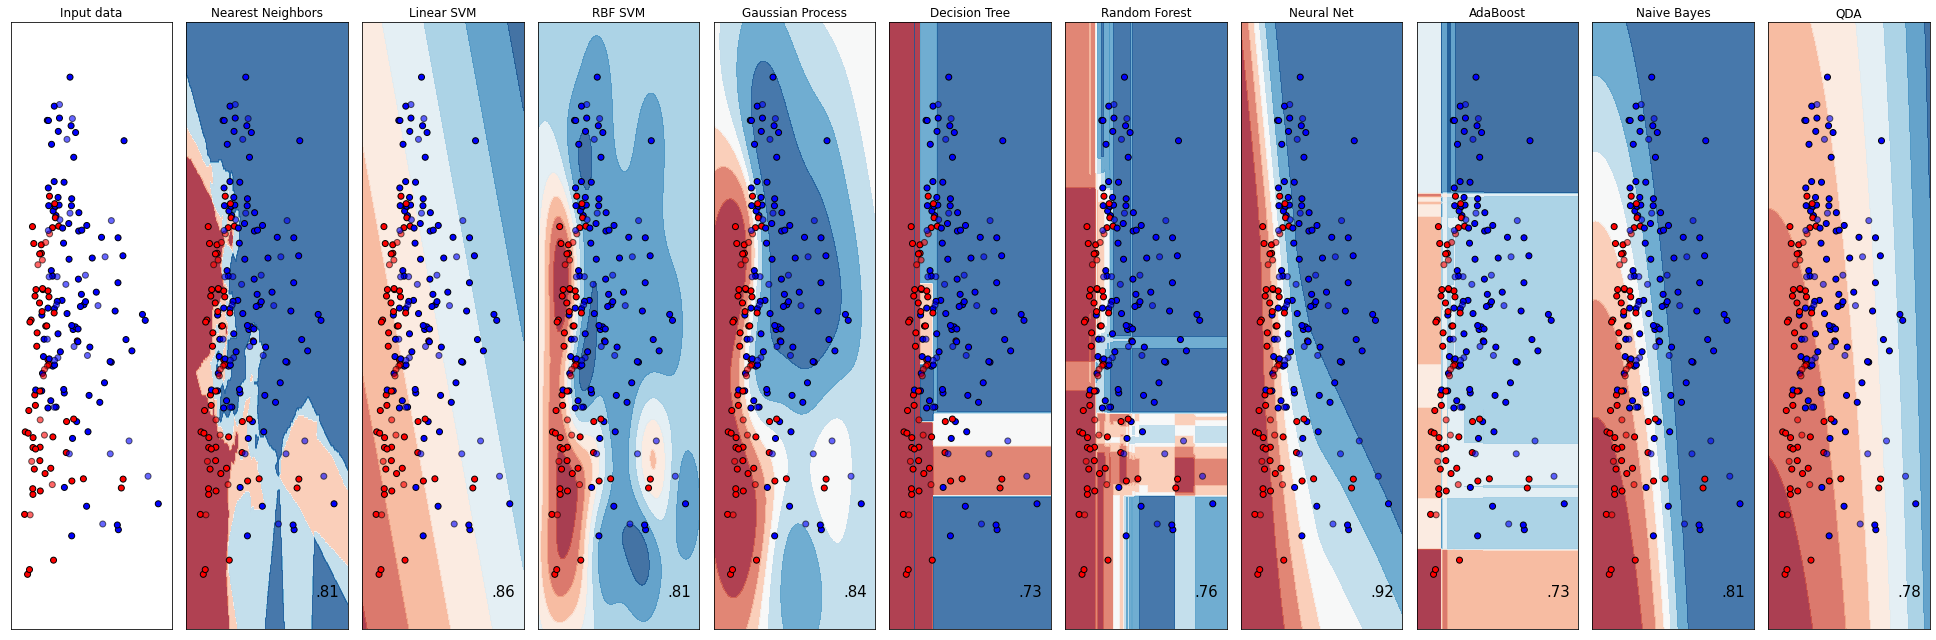

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X = fires_train.drop(['Classes','Date'], axis = 1).values
pca = PCA(n_components=2,svd_solver='full')
X = pca.fit_transform(X)
y = fires_train['Classes']

rng = np.random.RandomState(2)

datasets = [fires_1]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):

    X = StandardScaler().fit_transform(X)
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=.2, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

  #

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
      ax.set_title("Input data")

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1


    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_val, y_val)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [44]:
# Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [45]:
trainedmodel = LogisticRegression().fit(fires_trainx,fires_trainy)
predictions =trainedmodel.predict(fires_testx)
print(confusion_matrix(fires_testy,predictions))
print(classification_report(fires_testy,predictions))

[[33  4]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        37
           1       0.83      0.83      0.83        23

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



In [46]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(fires_trainx,fires_trainy)
predictionforest = trainedforest.predict(fires_testx)
print(confusion_matrix(fires_testy,predictionforest))
print(classification_report(fires_testy,predictionforest))

[[33  4]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        37
           1       0.83      0.83      0.83        23

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



In [47]:
trainedtree = tree.DecisionTreeClassifier().fit(fires_trainx,fires_trainy)
predictionstree = trainedtree.predict(fires_testx)
print(confusion_matrix(fires_testy,predictionstree))
print(classification_report(fires_testy,predictionstree))

[[34  3]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.86      0.83      0.84        23

    accuracy                           0.88        60
   macro avg       0.88      0.87      0.88        60
weighted avg       0.88      0.88      0.88        60



In [54]:
trainednb = GaussianNB().fit(fires_trainx,fires_trainy)
predictionnb = trainednb.predict(fires_testx)
print(confusion_matrix(fires_testy,predictionnb))
print(classification_report(fires_testy,predictionnb))

[[35  2]
 [ 6 17]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        37
           1       0.89      0.74      0.81        23

    accuracy                           0.87        60
   macro avg       0.87      0.84      0.85        60
weighted avg       0.87      0.87      0.86        60



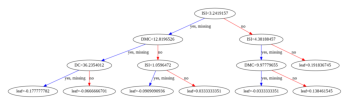

In [58]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
model = XGBClassifier()

# Train
model.fit(fires_trainx,fires_trainy)

plot_tree(model)
# plt.figure(figsize = (27,9))
plt.show()

In [60]:
pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_)

X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_pca, y, test_size = 0.30, random_state = 101)

trainednb = GaussianNB().fit(X_reduced, Y_Train)
trainedsvm = svm.LinearSVC().fit(X_reduced, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_reduced,Y_Train)
trainedmodel = LogisticRegression().fit(X_reduced,Y_Train)

print('Naive Bayes')
predictionnb = trainednb.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

print('SVM')
predictionsvm = trainedsvm.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

print('Random Forest')
predictionforest = trainedforest.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

print('Logistic Regression')
predictions =trainedmodel.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

Naive Bayes
[[18  2]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.94      0.94      0.94        36

    accuracy                           0.93        56
   macro avg       0.92      0.92      0.92        56
weighted avg       0.93      0.93      0.93        56

SVM
[[18  2]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.94      0.94      0.94        36

    accuracy                           0.93        56
   macro avg       0.92      0.92      0.92        56
weighted avg       0.93      0.93      0.93        56

Random Forest
[[18  2]
 [ 4 32]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.94      0.89      0.91        36

    accuracy                           0.89        56
   macro avg       0.88      0.89      0.

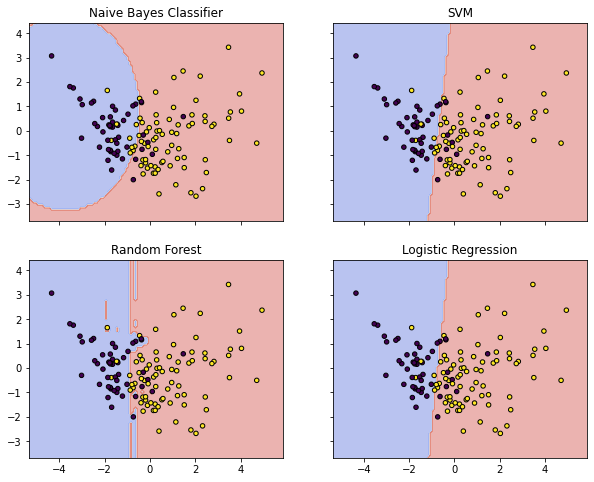

In [61]:
reduced_data = X_reduced

trainednb = GaussianNB().fit(reduced_data, Y_Train)
trainedsvm = svm.LinearSVC().fit(reduced_data, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(reduced_data,Y_Train)
trainedmodel = LogisticRegression().fit(reduced_data,Y_Train)

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [trainednb, trainedsvm, trainedforest, trainedmodel],
                        ['Naive Bayes Classifier', 'SVM',
                         'Random Forest', 'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    axarr[idx[0], idx[1]].contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(reduced_data[:, 0], reduced_data[:, 1], c=Y_Train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [66]:
fires_1.shape , firestst_1.shape

((184, 10), (60, 10))

**Polynomial Expansion:**
generate a new feature set consisting of all polynomial combinations of the features with degree less than or equal to the specified degree

In [67]:
# create polynomial combinations of feature 'ISI','DMC' with degree 2
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2,include_bias=False).fit(fires_1[['ISI','DMC']])
tmp = pf.transform(fires_1[['ISI','DMC']])
fires_1_copy = pd.DataFrame(tmp,columns=pf.get_feature_names(['ISI','DMC']))
print(fires_1_copy.head(6))

        ISI       DMC     ISI^2   ISI DMC      DMC^2
0  0.487246 -2.371083  0.237408 -1.155300   5.622032
1 -1.472158  0.441002  2.167250 -0.649225   0.194483
2  1.338737  3.389994  1.792216  4.538309  11.492059
3 -0.755090  5.179630  0.570161 -3.911089  26.828571
4  0.558249 -2.247164  0.311642 -1.254477   5.049746
5 -0.182703  5.110650  0.033380 -0.933729  26.118748


Gradient boost + Logistic Regression Feature encode

In [71]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,  roc_auc_score

gbdt = GradientBoostingClassifier(n_estimators=20)
one_hot = OneHotEncoder()

X_train = fires_1[[ 'ISI', 'DMC', 'FFMC', 'DC']].fillna(0)
X_test = firestst_1[[  'ISI', 'DMC', 'FFMC', 'DC']].fillna(0)

gbdt.fit(X_train, fires_trainy)

X_leaf_index = gbdt.apply(X_train)[:, :, 0]  # apply return the node index on each tree 
print("sample's belonging node of each base tree \n'",X_leaf_index)
# fit one-hot encoder
one_hot.fit(X_leaf_index)   
X_one_hot = one_hot.transform(X_leaf_index)  


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000)

lr.fit(X_one_hot,fires_trainy)
y_pred = lr.predict_proba(
    one_hot.transform(gbdt.apply(X_test)[:, :, 0]))[:,1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(fires_testy, y_pred)
print("AUC for GBDT derived feature + LR：", roc_auc_score(fires_testy, y_pred))

sample's belonging node of each base tree 
' [[ 3.  3.  3. ...  3.  3.  4.]
 [ 3.  3.  3. ...  3.  3.  4.]
 [ 3.  3.  3. ...  3.  3.  3.]
 ...
 [ 6.  6.  6. ...  7.  4.  4.]
 [ 3.  3.  3. ...  3.  3.  4.]
 [12. 12. 12. ... 14. 10. 14.]]
AUC for GBDT derived feature + LR： 0.9612220916568742


In [73]:
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

X_cubic = PolynomialFeatures(3).fit_transform(X)

feature_names = ['1', 'x', 'x^2', 'x^3']
# df_X_cubic = pd.DataFrame(X_cubic, columns=feature_names)

# _, axes = plt.subplots(1, 4, figsize=(10,2))
# for i in range(len(feature_names)):
#     df_X_cubic.plot.scatter(x='x', y=feature_names[i],ax=axes[i],xticks=[],yticks=[]);

In [89]:
data = pd.read_csv('/content/EE559_Project-main/datasets/algerian_fires_train.csv')
# For illustration purposes, we only select some of the columns
# data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
#              'occupation', 'income']]
data = data[['Rain',	'FFMC',	'DMC',	'DC',	'ISI',	'BUI']]
data

,Rain,FFMC,DMC,DC,ISI,BUI
0,-0.340306,73.063752,-2.371083,28.543573,0.487246,6.225461
1,0.939652,56.027977,0.441002,-10.007636,-1.472158,2.268104
2,1.397913,33.114404,3.389994,-13.774588,1.338737,-3.327908
3,3.958666,26.148986,5.179630,-1.392789,-0.755090,0.131303
4,13.394723,28.658020,-2.247164,-3.432689,0.558249,-1.928471
...,...,...,...,...,...,...
179,-0.161958,71.450733,57.128627,239.290670,11.267031,68.680725
180,0.127765,61.231373,18.986399,170.968390,9.496533,39.281865
181,0.995222,62.921683,27.594857,176.118476,-0.271474,30.340267
182,17.019373,47.242905,6.039570,-11.298033,0.035798,4.744741


In [90]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI'] 

Features after get_dummies:
 ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']


In [92]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (184, 92377)


In [93]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-1.53407195 -0.76422289 -0.6237257  -0.50138992 -0.25470094 -1.40354837
  -0.49593702 -1.04489793 -0.81895014]
 [ 0.15906389 -0.65417279 -0.11761328  0.16434053 -0.94748936 -1.19235389
  -1.22222177 -1.47659433 -1.08036166]
 [-1.93635603 -0.15115003 -0.88692183  0.40269083 -1.87930833 -0.97087731
  -1.29318919 -0.85729721 -1.45001785]
 [-0.89198977  1.83361445  0.49588558  1.73458739 -2.16256877 -0.83647121
  -1.05992252 -1.31860974 -1.22151248]
 [-1.48736828  2.04164298  1.65228255  6.64246173 -2.0605347  -1.39424178
  -1.09835319 -1.02925446 -1.35757516]]
Entries of X_poly:
[[-1.53407195 -0.76422289 -0.6237257  ...  0.22090597  0.17313746
   0.13569837]
 [ 0.15906389 -0.65417279 -0.11761328 ...  4.04646407  2.96062672
   2.16616543]
 [-1.93635603 -0.15115003 -0.88692183 ... 14.36314691 24.29358109
  41.08974766]
 [-0.89198977  1.83361445  0.49588558 ...  8.61818509  7.98357562
   7.39569632]
 [-1.48736828  2.04164298  1.65228255 ... 12.22240266 16.12121283
  21.263699

In [96]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x6^2', 'x6 x7', 'x6 x8', 'x7^2', 'x7 x8', 'x8^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4', 'x0^2 x5', 'x0^2 x6', 'x0^2 x7', 'x0^2 x8', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x1 x4', 'x0 x1 x5', 'x0 x1 x6', 'x0 x1 x7', 'x0 x1 x8', 'x0 x2^2', 'x0 x2 x3', 'x0 x2 x4', 'x0 x2 x5', 'x0 x2 x6', 'x0 x2 x7', 'x0 x2 x8', 'x0 x3^2', 'x0 x3 x4', 'x0 x3 x5', 'x0 x3 x6', 'x0 x3 x7', 'x0 x3 x8', 'x0 x4^2', 'x0 x4 x5', 'x0 x4 x6', 'x0 x4 x7', 'x0 x4 x8', 'x0 x5^2', 'x0 x5 x6', 'x0 x5 x7', 'x0 x5 x8', 'x0 x6^2', 'x0 x6 x7', 'x0 x6 x8', 'x0 x7^2', 'x0 x7 x8', 'x0 x8^2', 'x1

In [102]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# reg = LinearRegression().fit(X_poly, y)

# line_poly = poly.transform(line)
# plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
# plt.plot(X[:, 0], y, 'o', c='k')
# plt.ylabel("Regression output")
# plt.xlabel("Input feature")
# plt.legend(loc="best")

In [103]:
# from sklearn.svm import SVR

# for gamma in [1, 10]:
#     svr = SVR(gamma=gamma).fit(X, y)
#     plt.plot(fires_trainy, svr.predict(fires_trainy), label='SVR gamma={}'.format(gamma))

# plt.plot(X[:, 0], y, 'o', c='k')
# plt.ylabel("Regression output")
# plt.xlabel("Input feature")
# plt.legend(loc="best")